In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Iris\Iris_AW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4
0,5.1,3.5,1.4,0.2
1,NaN,3.0,1.4,NaN
2,NaN,3.2,1.3,NaN
3,NaN,3.1,1.5,NaN
4,NaN,3.6,1.4,NaN
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,NaN,3.4,5.4,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	57
float64		column 2	0
float64		column 3	0
float64		column 4	57


In [4]:
df.describe()

,column 1,column 2,column 3,column 4
count,93.000000,150.000000,150.000000,93.000000
mean,5.880645,3.054000,3.758667,1.276344
std,0.691290,0.433594,1.764420,0.684518
min,4.300000,2.000000,1.000000,0.100000
25%,5.400000,2.800000,1.600000,1.000000
50%,5.800000,3.000000,4.350000,1.400000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.400000


<AxesSubplot:>

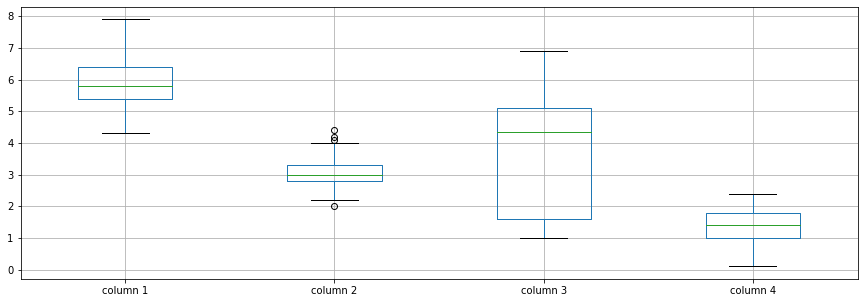

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    5.880645
column 2    3.054000
column 3    3.758667
column 4    1.276344
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4
column 1,1.000000,-0.055776,0.811410,0.758880
column 2,-0.055776,1.000000,-0.420516,-0.395160
column 3,0.811410,-0.420516,1.000000,0.953068
column 4,0.758880,-0.395160,0.953068,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [4,4+78,4+78+78,4+78+78+78,4+78+78+78+78,4+78+78+78,4+78+78,4+78,4], vae_layer = False, seed = 4)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [4]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 11.779339684380425
Epoch: 1 , loss: 11.762809541490343
Epoch: 2 , loss: 11.731724527147081
Epoch: 3 , loss: 11.752311176723904
Epoch: 4 , loss: 11.68818802303738
Epoch: 5 , loss: 11.620193163553873
Epoch: 6 , loss: 11.698072221544054
Epoch: 7 , loss: 11.695991939968533
Epoch: 8 , loss: 11.760489039950901
Epoch: 9 , loss: 11.692639668782553
Epoch: 10 , loss: 11.603222423129612
Epoch: 11 , loss: 11.840597258673775
Epoch: 12 , loss: 11.556640413072374
Epoch: 13 , loss: 11.786907725863987
Epoch: 14 , loss: 11.625792927212185
Epoch: 15 , loss: 11.800806363423666
Epoch: 16 , loss: 11.657614919874403
Epoch: 17 , loss: 11.781675868564182
Epoch: 18 , loss: 11.700274467468262
Epoch: 19 , loss: 11.686526510450575
Epoch: 20 , loss: 11.743543095058865
Epoch: 21 , loss: 11.759426222907173
Epoch: 22 , loss: 11.652222527398003
Epoch: 23 , loss: 11.704257117377388
Epoch: 24 , loss: 11.65946494208442
Epoch: 25 , loss: 11

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(150, 4)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.772772
column 2    3.700000
column 3    1.500000
column 4    0.682778
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Iris.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4
0,0.000000,0.0,0.0,0.000000
1,-4.886632,0.0,0.0,-0.189928
2,-2.095249,0.0,0.0,0.336058
3,0.924520,0.0,0.0,1.839528
4,-4.956786,0.0,0.0,-0.149317
...,...,...,...,...
145,0.000000,0.0,0.0,0.000000
146,0.000000,0.0,0.0,0.000000
147,0.000000,0.0,0.0,0.000000
148,-3.388943,0.0,0.0,-1.653223


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(34.67446891787096, 97.653468960401)

In [17]:
NRMS=numerator/denominator
NRMS


0.3550766735376461

In [18]:
new_df.iloc[66,:]

column 1    5.6
column 2    3.0
column 3    4.5
column 4    1.5
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4
0,5.100000,3.5,1.4,0.200000
1,0.013368,3.0,1.4,0.010072
2,2.604751,3.2,1.3,0.536058
3,5.524520,3.1,1.5,2.039528
4,0.043214,3.6,1.4,0.050683
...,...,...,...,...
145,6.700000,3.0,5.2,2.300000
146,6.300000,2.5,5.0,1.900000
147,6.500000,3.0,5.2,2.000000
148,2.811057,3.4,5.4,0.646777


In [20]:
imputations[-1].to_excel("Iris_AW_20(imp).xlsx", index=False, header=False)